<a href="https://colab.research.google.com/github/Kodieswari28/titanic--cleaning--project-/blob/main/titanic_cleaned_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Titanic dataset - direct create
import pandas as pd

data = {
    'PassengerId': [1, 2, 3],
    'Survived': [0, 1, 1],
    'Pclass': [3, 1, 3],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina'],
    'Sex': ['male', 'female', 'female'],
    'Age': [22, 38, 26],
    'SibSp': [1, 1, 0],
    'Parch': [0, 0, 0],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282'],
    'Fare': [7.25, 71.2833, 7.925],
    'Cabin': [None, 'C85', None],
    'Embarked': ['S', 'C', 'S']
}

df = pd.DataFrame(data)
df.head()# Titanic dataset - direct create
import pandas as pd

data = {
    'PassengerId': [1, 2, 3],
    'Survived': [0, 1, 1],
    'Pclass': [3, 1, 3],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina'],
    'Sex': ['male', 'female', 'female'],
    'Age': [22, 38, 26],
    'SibSp': [1, 1, 0],
    'Parch': [0, 0, 0],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282'],
    'Fare': [7.25, 71.2833, 7.925],
    'Cabin': [None, 'C85', None],
    'Embarked': ['S', 'C', 'S']
}

df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,None,S


In [ ]:
# Null values check
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-922360860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-922360860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Encode categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,True,True
1,2,1,1,"Cumings, Mrs. John Bradley",38,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df[['Age', 'Fare']].head()

,Age,Fare
0,-0.980581,-0.718317
1,1.372813,1.414154
2,-0.392232,-0.695837


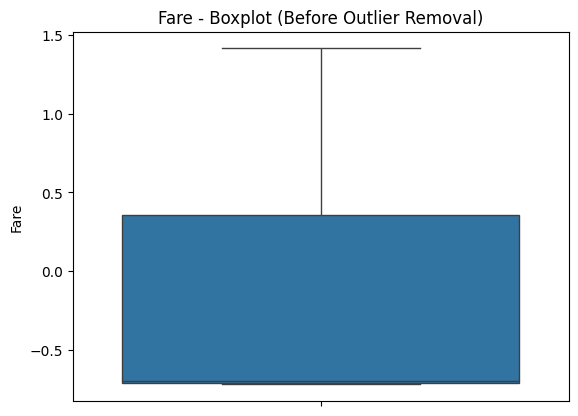

In [ ]:
# Outlier detection with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Fare'])
plt.title("Fare - Boxplot (Before Outlier Removal)")
plt.show()

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Keep only data within valid range
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

print("After outlier removal, dataset shape is:", df.shape)

After outlier removal, dataset shape is: (3, 11)
